In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")



df_current = pd.read_csv("application_data.csv")
df_previous = pd.read_csv("previous_application.csv")
df_current.head()



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_merged = pd.merge(df_current, df_previous, how='inner', on='SK_ID_CURR')
df_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [5]:
df_merged1 = pd.merge(df_current, df_previous, how='outer', on='SK_ID_CURR')
df_merged1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [6]:
print(df_merged.shape)

(1413701, 158)


In [7]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB
None


In [8]:
# summing up the missing values (column-wise)
df_merged.isnull().sum()

SK_ID_CURR                            0
TARGET                                0
NAME_CONTRACT_TYPE_x                  0
CODE_GENDER                           0
FLAG_OWN_CAR                          0
FLAG_OWN_REALTY                       0
CNT_CHILDREN                          0
AMT_INCOME_TOTAL                      0
AMT_CREDIT_x                          0
AMT_ANNUITY_x                        93
AMT_GOODS_PRICE_x                  1208
NAME_TYPE_SUITE_x                  3526
NAME_INCOME_TYPE                      0
NAME_EDUCATION_TYPE                   0
NAME_FAMILY_STATUS                    0
NAME_HOUSING_TYPE                     0
REGION_POPULATION_RELATIVE            0
DAYS_BIRTH                            0
DAYS_EMPLOYED                         0
DAYS_REGISTRATION                     0
DAYS_ID_PUBLISH                       0
OWN_CAR_AGE                      937206
FLAG_MOBIL                            0
FLAG_EMP_PHONE                        0
FLAG_WORK_PHONE                       0


In [9]:
# columns having at least one missing value
df_merged.isnull().any()

SK_ID_CURR                      False
TARGET                          False
NAME_CONTRACT_TYPE_x            False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                    False
AMT_INCOME_TOTAL                False
AMT_CREDIT_x                    False
AMT_ANNUITY_x                    True
AMT_GOODS_PRICE_x                True
NAME_TYPE_SUITE_x                True
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
NAME_FAMILY_STATUS              False
NAME_HOUSING_TYPE               False
REGION_POPULATION_RELATIVE      False
DAYS_BIRTH                      False
DAYS_EMPLOYED                   False
DAYS_REGISTRATION               False
DAYS_ID_PUBLISH                 False
OWN_CAR_AGE                      True
FLAG_MOBIL                      False
FLAG_EMP_PHONE                  False
FLAG_WORK_PHONE                 False
FLAG_CONT_MOBILE                False
FLAG_PHONE  

In [10]:
# sum it up to check how many rows have all missing values
df_merged.isnull().all(axis=1).sum()

0

In [11]:
# summing up the missing values (column-wise)
round(100*(df_merged.isnull().sum()/len(df_merged.index)), 2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE_x             0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT_x                     0.00
AMT_ANNUITY_x                    0.01
AMT_GOODS_PRICE_x                0.09
NAME_TYPE_SUITE_x                0.25
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     66.29
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [12]:
# removing the three columns
df_merged = df_merged.drop('RATE_INTEREST_PRIMARY', axis=1)
df_merged = df_merged.drop('RATE_INTEREST_PRIVILEGED', axis=1)
df_merged = df_merged.drop('OWN_CAR_AGE', axis=1)

round(100*(df_merged.isnull().sum()/len(df_merged.index)), 2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE_x             0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT_x                     0.00
AMT_ANNUITY_x                    0.01
AMT_GOODS_PRICE_x                0.09
NAME_TYPE_SUITE_x                0.25
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [13]:
# count the number of rows having > 5 missing values
# use len(df.index)
len(df_merged[df_merged.isnull().sum(axis=1) > 5].index)

1202121

In [ ]:
# 1202121 rows have more than 50 missing values
# calculate the percentage
100*(len(df_merged[df_merged.isnull().sum(axis=1) > 50].index) / len(df_merged.index))

In [ ]:
# retaining the rows having <= 50 NaNs
df_merged = df_merged[df_merged.isnull().sum(axis=1) <= 50]

# look at the summary again
round(100*(df_merged.isnull().sum()/len(df_merged.index)), 2)

In [ ]:
df_merged.head(100)

In [ ]:
print(df_merged.info())

In [ ]:
# loading libraries and reading the data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting seaborn theme
sns.set(style="white")

In [15]:
# Read documentation
help(pd.DataFrame.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    Create a spreadsheet-style pivot table as a DataFrame. The levels in the
    pivot table will be stored in MultiIndex objects (hierarchical indexes) on
    the index and columns of the result DataFrame
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The list
        can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed, it
        is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The list
        can c

In [18]:
# E.g. compare mean of income across education type
df_merged.pivot_table(values = 'AMT_INCOME_TOTAL', index = 'NAME_EDUCATION_TYPE', aggfunc = 'mean')

,AMT_INCOME_TOTAL
NAME_EDUCATION_TYPE,
Academic degree,260681.347150
Higher education,209347.333170
Incomplete higher,187694.989449
Lower secondary,137040.260516
Secondary / secondary special,162380.288489


In [31]:
#FLAG_CONT_MOBILE # Create a function to be applied
def is_reachable(x):
    return x > 0

# Create a new column
df_merged['is_reachable'] = df_merged['FLAG_CONT_MOBILE'].apply(is_reachable)
df_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,is_reachable
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,True
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,True
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,True
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0,True
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,True


In [29]:
# Comparing percentage of profitable orders across customer segments
by_yieldGroup = df_merged.groupby('NAME_YIELD_GROUP')
by_yieldGroup.is_reachable.mean()

NAME_YIELD_GROUP
XNA           0.999192
high          0.999373
low_action    0.999313
low_normal    0.999189
middle        0.999228
Name: is_reachable, dtype: float64

In [ ]:
# Comparing percentage of profitable orders across customer segments
by_reachable = df_merged.groupby('is_reachable')
by_reachable.is_reachable.mean()

In [32]:
# Create a new column using a lambda function
df_merged['loan_paid'] = df_merged['TARGET'].apply(lambda x: x > 0)
df_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,is_reachable,loan_paid
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,True,True
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,True,False
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,True,False
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0,True,False
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,True,False


In [35]:
df_merged.pivot_table(values = 'loan_paid', index = 'NAME_YIELD_GROUP', aggfunc = 'mean')

,loan_paid
NAME_YIELD_GROUP,
XNA,0.098633
high,0.095452
low_action,0.064514
low_normal,0.071321
middle,0.080432


In [40]:
#percentage risk of default who is more willing to pay and who is going to default by category
df_merged.pivot_table(values = 'loan_paid', 
                      index = 'NAME_YIELD_GROUP', 
                      columns = 'OCCUPATION_TYPE', 
                      aggfunc = 'mean')

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
NAME_YIELD_GROUP,,,,,,,,,,,,,,,,,,
XNA,0.065981,0.107125,0.124018,0.079704,0.136392,0.089032,0.083524,0.090323,0.129504,0.212021,0.079684,0.090840,0.066715,0.117402,0.111790,0.090960,0.139698,0.122340
high,0.062902,0.096698,0.115177,0.073095,0.124964,0.080488,0.077747,0.054054,0.117326,0.191205,0.080136,0.079665,0.073484,0.106040,0.107099,0.086038,0.117039,0.122555
low_action,0.052066,0.067762,0.103821,0.046683,0.092550,0.041176,0.046346,0.028777,0.084108,0.176871,0.047790,0.062413,0.050420,0.111111,0.076198,0.038922,0.113699,0.063973
low_normal,0.045243,0.079520,0.089119,0.055716,0.101447,0.055102,0.055242,0.077419,0.094123,0.159798,0.060577,0.058142,0.052799,0.092262,0.084538,0.085286,0.096364,0.097656
middle,0.054526,0.082504,0.099680,0.067207,0.113370,0.072650,0.062768,0.065445,0.102278,0.182785,0.070251,0.070276,0.063025,0.072802,0.093548,0.065217,0.102596,0.094488


In [ ]:
#can you plot this chart please? this explains that if you get a application from a HR Staff who is in low_action group 
# then he will default loan, he is high risk,

In [45]:
df_mergedPivot = df_merged.pivot_table(values = 'loan_paid', 
                      index = 'NAME_YIELD_GROUP', 
                      columns = 'OCCUPATION_TYPE', 
                      aggfunc = 'mean')

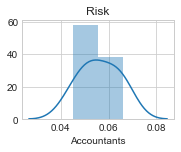

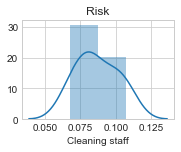

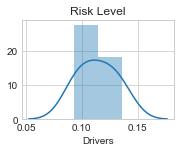

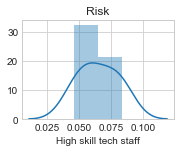

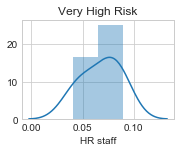

In [55]:
plt.subplot(2, 2, 1)
plt.title('Risk')
sns.distplot(df_mergedPivot['Accountants'])
plt.show()

plt.subplot(2, 2, 1)
plt.title('Risk')
sns.distplot(df_mergedPivot['Cleaning staff'])
plt.show()

plt.subplot(2, 2, 1)
plt.title('Risk Level')
sns.distplot(df_mergedPivot['Drivers'])
plt.show()

plt.subplot(2, 2, 1)
plt.title('Risk')
sns.distplot(df_mergedPivot['High skill tech staff'])
plt.show()

plt.subplot(2, 2, 1)
plt.title('Very High Risk')
sns.distplot(df_mergedPivot['HR staff'])

plt.show()

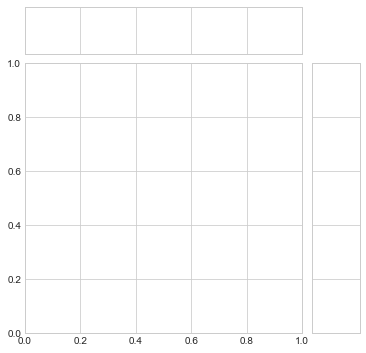

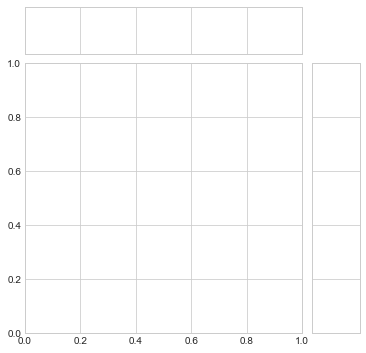

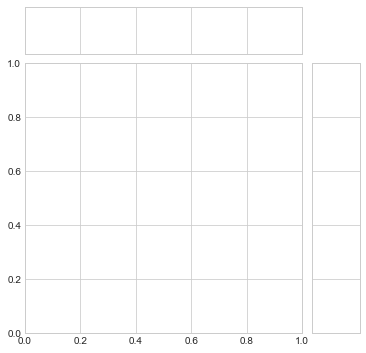

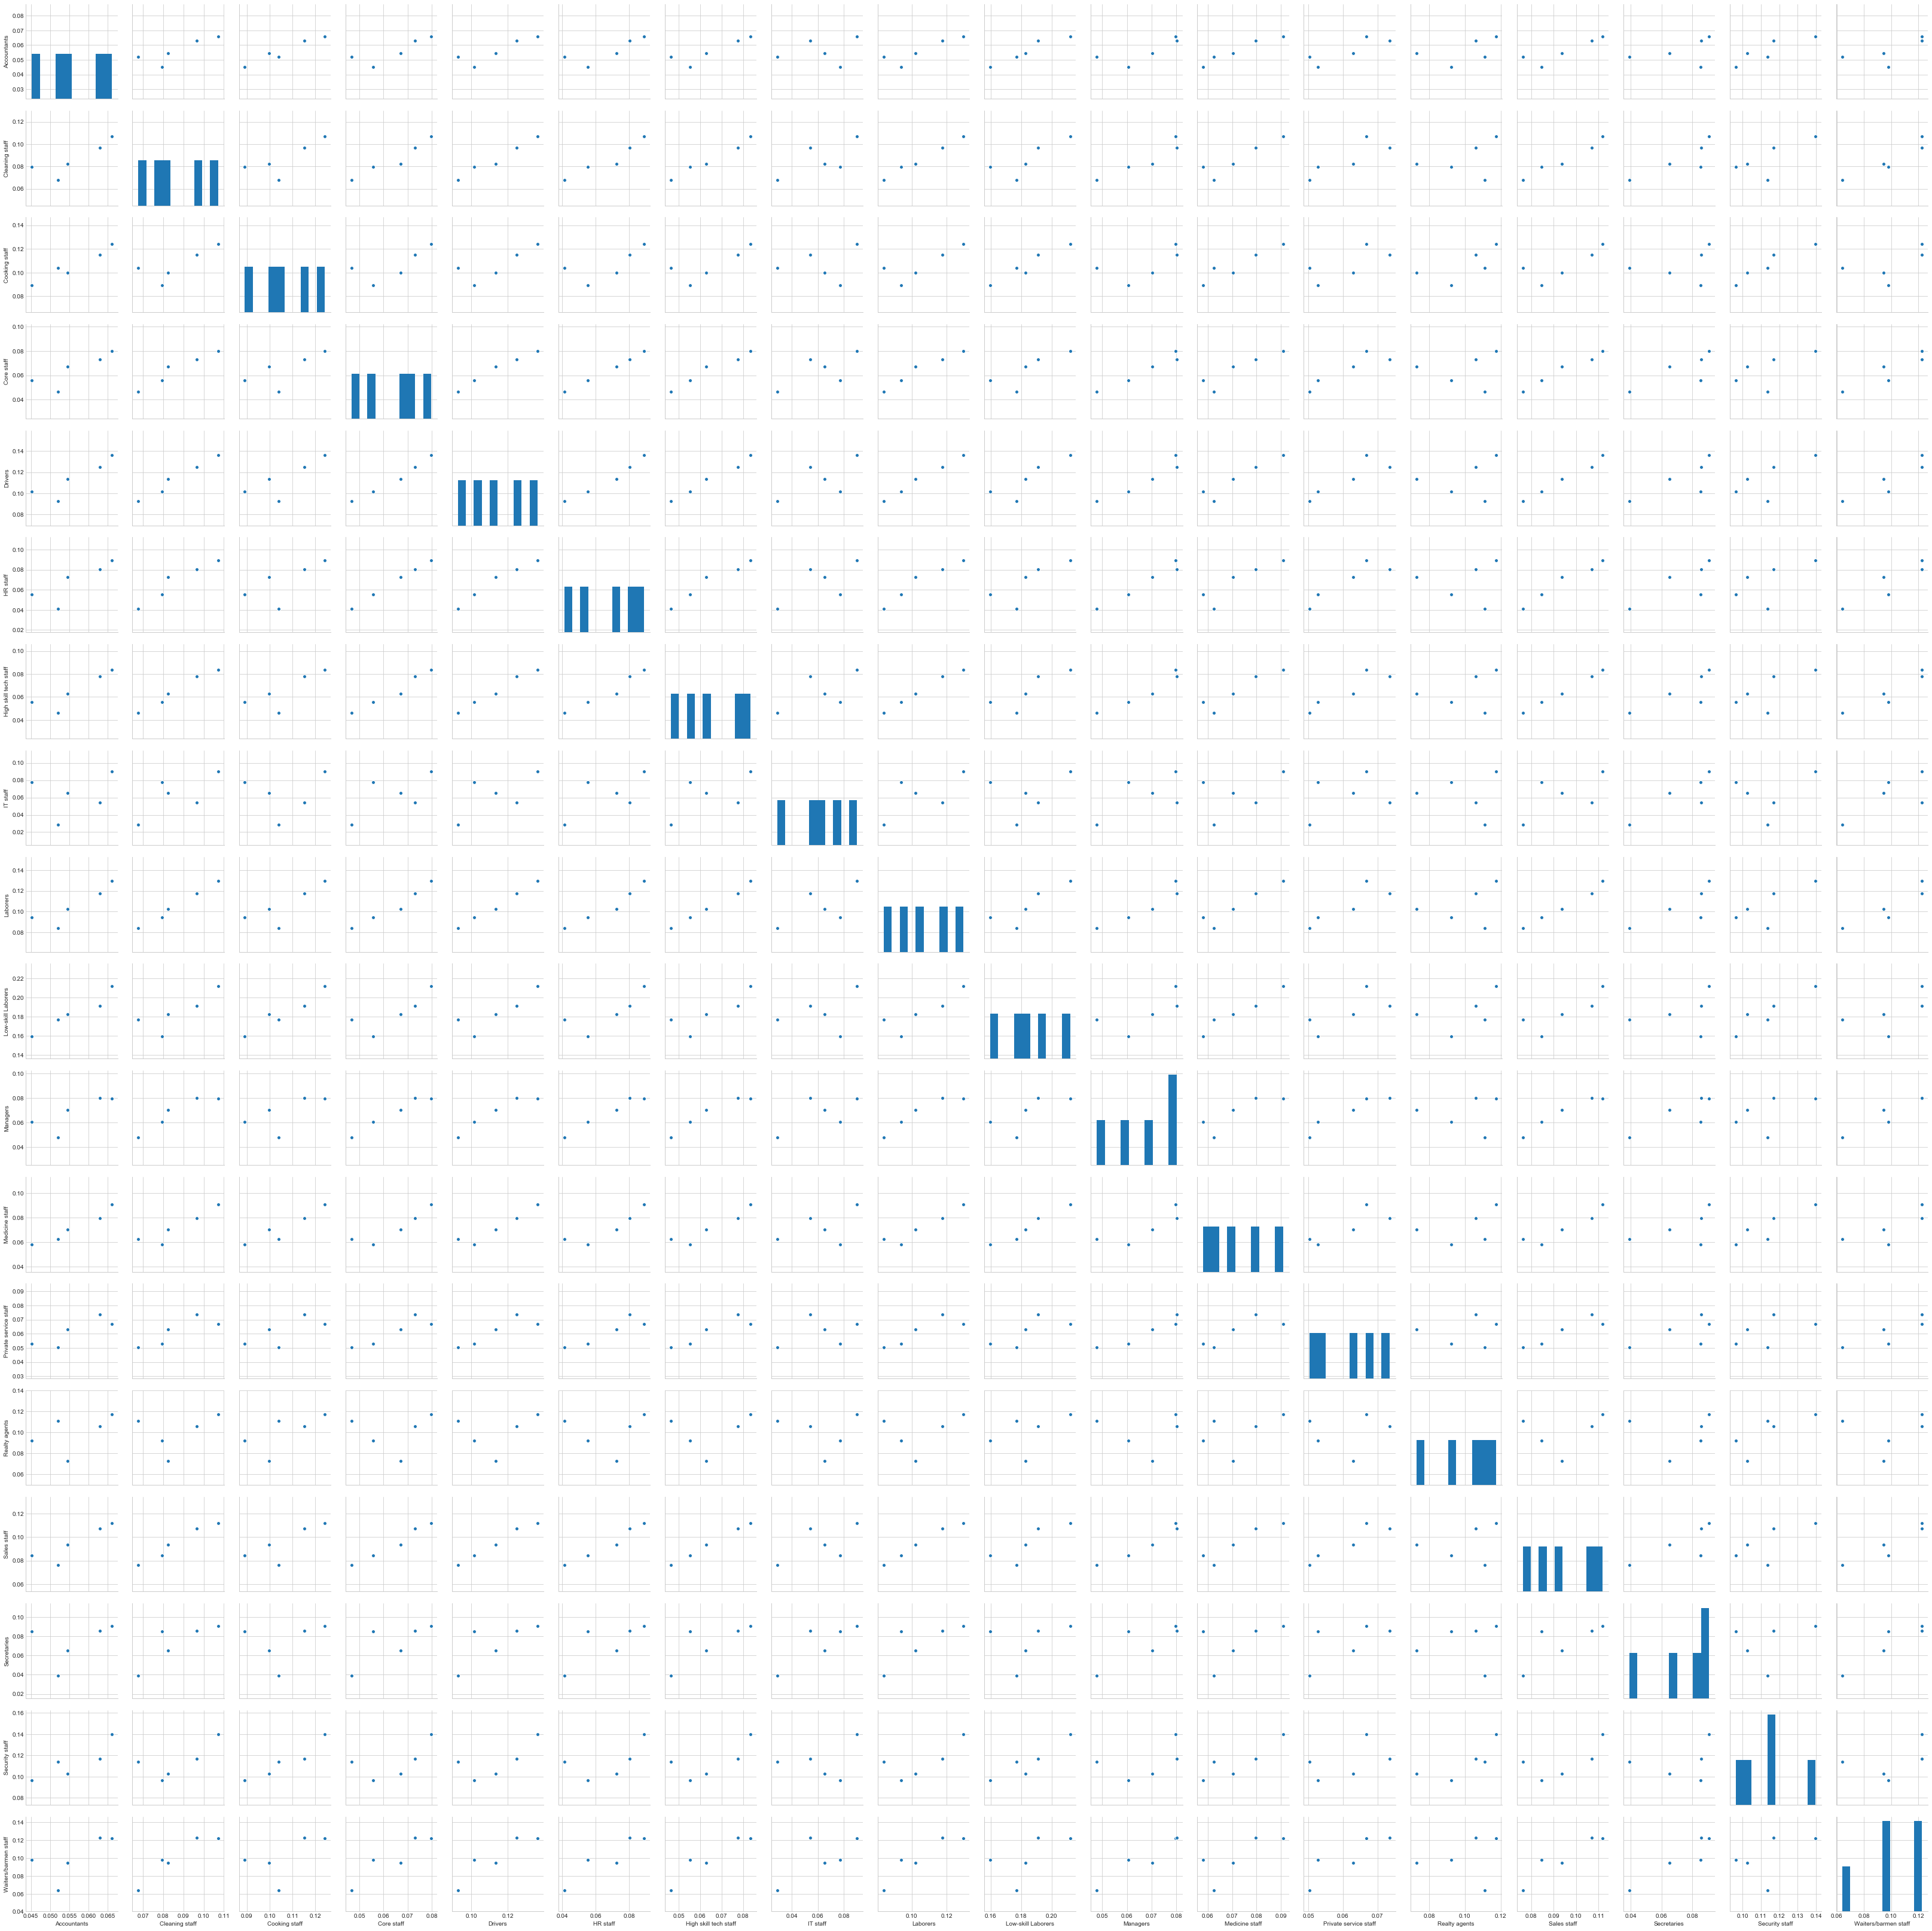

In [67]:
sns.pairplot(df_mergedPivot)
plt.show()

In [68]:
cor = df_mergedPivot.corr()
round(cor, 3)

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
OCCUPATION_TYPE,,,,,,,,,,,,,,,,,,
Accountants,1.000,0.837,0.972,0.835,0.881,0.821,0.879,0.237,0.877,0.963,0.777,0.970,0.836,0.496,0.879,0.390,0.869,0.683
Cleaning staff,0.837,1.000,0.777,0.961,0.985,0.952,0.989,0.694,0.995,0.812,0.933,0.922,0.831,0.343,0.981,0.819,0.718,0.944
Cooking staff,0.972,0.777,1.000,0.724,0.802,0.703,0.799,0.177,0.813,0.961,0.641,0.939,0.699,0.671,0.790,0.306,0.952,0.580
Core staff,0.835,0.961,0.724,1.000,0.989,0.999,0.978,0.662,0.974,0.808,0.978,0.910,0.898,0.119,0.985,0.752,0.616,0.918
Drivers,0.881,0.985,0.802,0.989,1.000,0.982,0.992,0.644,0.996,0.862,0.953,0.952,0.875,0.265,0.992,0.741,0.719,0.912
HR staff,0.821,0.952,0.703,0.999,0.982,1.000,0.972,0.661,0.966,0.791,0.982,0.896,0.903,0.085,0.980,0.752,0.588,0.918
High skill tech staff,0.879,0.989,0.799,0.978,0.992,0.972,1.000,0.609,0.994,0.829,0.963,0.935,0.903,0.299,0.999,0.774,0.698,0.943
IT staff,0.237,0.694,0.177,0.662,0.644,0.661,0.609,1.000,0.651,0.328,0.621,0.458,0.323,-0.082,0.598,0.836,0.257,0.701
Laborers,0.877,0.995,0.813,0.974,0.996,0.966,0.994,0.651,1.000,0.855,0.939,0.950,0.856,0.332,0.990,0.766,0.742,0.923


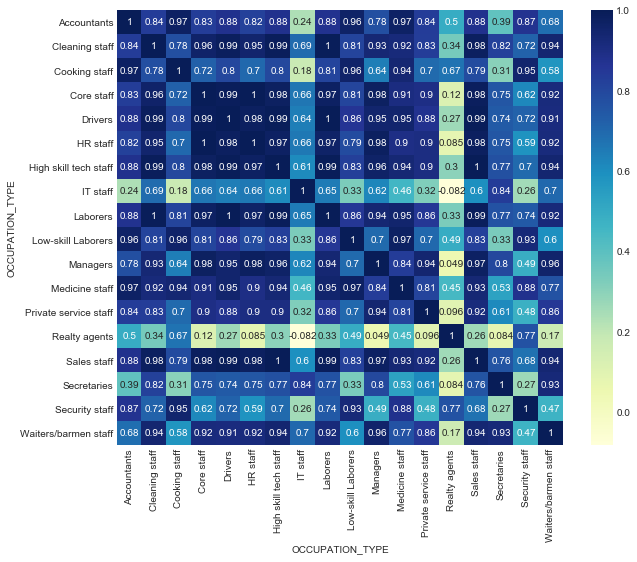

In [69]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

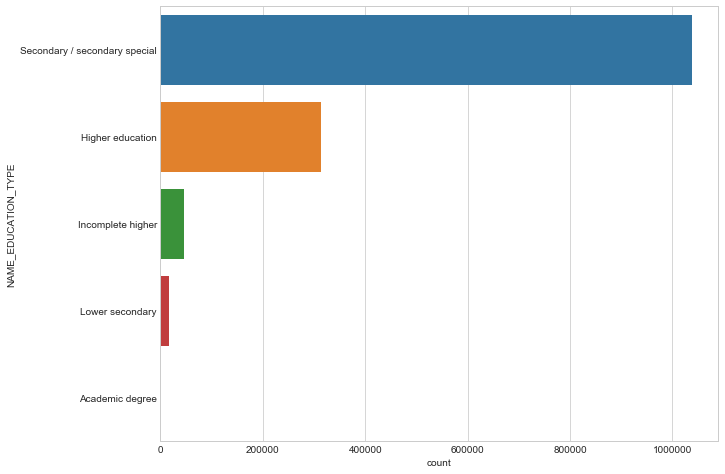

In [71]:
# Plotting count across a categorical variable 
plt.figure(figsize=(10, 8))
sns.countplot(y="NAME_EDUCATION_TYPE", data=df_merged)
plt.show()